In [25]:
import numpy as np
from numpy import exp, loadtxt, pi, sqrt
from scipy import stats
from scipy.stats import binned_statistic 
from astropy.table import Table, Column, MaskedColumn
import math
import matplotlib.pyplot as plt
import pylab
from astropy.io import ascii
import pickle
import pandas as pd
import os.path
from numpy import exp, loadtxt, pi, sqrt

In [2]:
def am(val):
    return (val[1:]+val[:-1])/2

from scipy import interpolate
def confidence_intervals(z,dx=1,dy=1):
    """
    takes normalised probability distribution as input (fi dx,dy=1 then probdist=n/Ntotal)
    outputs the level of the contour at which 75% 50% and 25%
    """
    n = 20
    t = np.linspace(0, z.max(), n)
    integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2)) *dx*dy
    f = interpolate.interp1d(integral, t)
    t_contours = f(np.array([0.95,0.68,0.40]))
    return np.append(t_contours,1)

In [73]:
#Obtengo la max y min mass de TNG LH (bar) 
nsim = 27
lista_columns = ['id','pid','Mvir','Rvir','Spin','Rs_Klypin','ba','ca','ba500c','ca500c', 'TidalForce'] 


path = '../Data/Rockstar/IllustrisTNG/CV/CV_'
for i in range(nsim):
    if i == 0:
        data_bar = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,10,11,26,37,46,47,51,52,81), low_memory=False)
    if i > 0: 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,10,11,26,37,46,47,51,52,81), low_memory=False)
        data_bar = pd.concat([data_bar, data_aux])
  

cv = data_bar.Rvir / data_bar.Rs_Klypin
data_bar.insert(9,'cv', cv)
data_bar

,id,pid,Mvir,Rvir,Spin,Rs_Klypin,ba,ca,ba500c,cv,ca500c,TidalForce
0,344582,-1,5.185000e+13,761.179,0.01576,108.21300,0.70149,0.44993,0.66518,7.034081,0.43560,0.00000
1,344705,-1,2.447000e+13,592.586,0.02655,117.58700,0.85064,0.63682,0.73052,5.039554,0.55627,0.00000
2,348606,-1,2.410000e+13,589.585,0.09712,117.70500,0.56102,0.39976,0.49704,5.009006,0.40053,0.07410
3,348588,-1,1.993000e+13,553.399,0.02610,69.91930,0.60733,0.51191,0.58078,7.914825,0.47700,0.39902
4,343262,-1,1.959000e+13,550.248,0.01791,37.00850,0.71073,0.66767,0.71648,14.868152,0.66056,0.01230
...,...,...,...,...,...,...,...,...,...,...,...,...
6857,359728,-1,1.946000e+08,11.830,0.02716,0.64873,0.00000,0.00000,0.00000,18.235630,0.00000,0.34484
6858,359426,-1,1.427000e+08,10.666,0.66985,0.69526,0.00000,0.00000,0.00000,15.341024,0.00000,0.20836
6859,355962,-1,1.298000e+08,10.334,0.00000,0.74380,0.00000,0.00000,0.00000,13.893520,0.00000,0.20881
6860,356573,-1,1.298000e+08,10.334,0.00000,3.38284,0.00000,0.00000,0.00000,3.054830,0.00000,0.25238


In [74]:
#Obtengo la max y min mass de TNG LH (bar) 

path = '../Data/Rockstar/IllustrisTNG_DM/CV/CV_'
for i in range(nsim):
    if i == 0:
        data_dm = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,10,11,26,37,46,47,51,52,81), low_memory=False)
    if i > 0: 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,10,11,26,37,46,47,51,52,81), low_memory=False)
        data_dm = pd.concat([data_dm, data_aux])
  

cv = data_dm.Rvir / data_dm.Rs_Klypin
data_dm.insert(9,'cv', cv)
data_dm

,id,pid,Mvir,Rvir,Spin,Rs_Klypin,ba,ca,ba500c,cv,ca500c,TidalForce
0,305741,-1,5.031000e+13,753.539,0.01896,84.70250,0.69481,0.42100,0.63980,8.896302,0.40566,305741
1,306461,-1,2.601000e+13,604.806,0.02458,89.63340,0.60011,0.49157,0.53776,6.747552,0.47619,306461
2,309555,-1,2.529000e+13,599.171,0.10019,109.45500,0.67742,0.45648,0.55888,5.474131,0.51457,309555
3,309717,-1,2.224000e+13,574.011,0.02400,55.56900,0.55763,0.47808,0.52083,10.329698,0.43896,309717
4,303801,-1,2.156000e+13,568.145,0.04278,50.95240,0.52638,0.50137,0.49578,11.150505,0.47999,303801
...,...,...,...,...,...,...,...,...,...,...,...,...
7383,317445,-1,8.530000e+08,19.359,0.03980,0.92893,0.70426,0.31840,0.92305,20.840106,0.05390,317445
7384,317381,317510,6.204000e+08,17.409,0.02298,1.46860,0.03328,0.00016,0.88646,11.854147,0.06240,317381
7385,319255,-1,6.204000e+08,17.409,0.28103,1.21875,0.66933,0.08259,0.47274,14.284308,0.06581,319255
7386,315300,315454,5.428000e+08,16.651,0.34660,4.37046,0.85686,0.00205,0.00000,3.809896,0.00000,315300


# Haloscope analysis

In [ ]:
from haloscope import ConditionalMultiVariateGaussian 

In [84]:
halos_bar = data_bar[(data_bar.pid == -1) & (data_bar.Mvir > 2e11)  & (data_bar.Mvir < 1e12)]

print(len(halos_bar))
min_mass_hbar        = halos_bar.Mvir.min()
max_mass_hbar        = halos_bar.Mvir.max()

halos_dm = data_dm[(data_dm.pid == -1) & (data_dm.Mvir > 2e11) & (data_dm.Mvir < 1e12)]

print(len(halos_dm))
min_mass_hDM = halos_dm.Mvir.min()
max_mass_hDM = halos_dm.Mvir.max()

5378
5801


In [85]:
cg = ConditionalMultiVariateGaussian(A=None,b=None)

In [96]:
x_train = np.asarray(halos_bar[['Mvir', 'TidalForce']]) #np.random.randn(100000,2) ## this could be 100000 baryonified haloes with 2 input properties
y_train = np.asarray(halos_bar[['Spin','ba', 'ca', 'cv']]) #np.random.randn(100000,3) ## this could be 100000 baryonified haloes with 3 output properties
x_test  = np.asarray(halos_dm[['Mvir', 'TidalForce']]) #np.random.randn(20000,2)   ## this could be 20000 dm haloes with 2 input properties

print (x_train.shape)
print (y_train.shape)

(5378, 2)
(5378, 4)


In [97]:
cg.fit(x_train,y_train)
y_pred = cg.predict(x_test)

In [98]:
y_pred.shape

(5801, 4)

## plots

In [8]:
valy1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ba, bins=30, density = False)
edgex = am(edge1)
edgey = am(edge2)

Text(0, 0.5, '$b/a$')

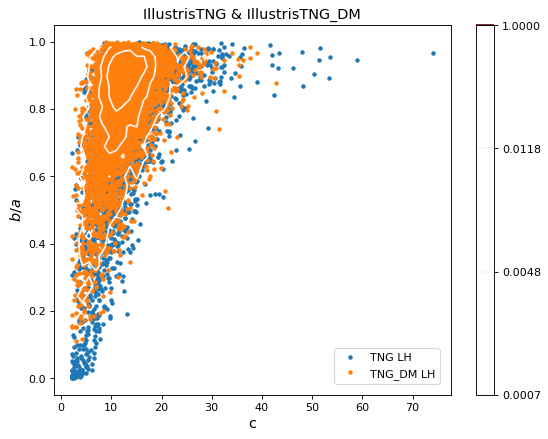

In [9]:
pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(halos_bar.cv, halos_bar.ba,'.',label = "TNG LH")
plt.plot(halos_dm.cv, halos_dm.ba,'.',label = "TNG_DM LH")

#plt.contour(edgex, edgey, valy1.T / np.sum(valy1), levels = 5, cmap = 'Purples')
#plt.colorbar()

lvl = confidence_intervals(valy1.T/valy1.sum())
plt.contour(edgex, edgey,valy1.T/valy1.sum(),levels=lvl,cmap='Reds')
plt.colorbar()

plt.title('IllustrisTNG & IllustrisTNG_DM', fontsize = 13)
plt.legend(loc = 0, borderaxespad = 1.)
plt.xlabel('c', fontsize=13)
plt.ylabel(r'$b/a$', fontsize=13)
#plt.xscale('log')
#plt.yscale('log')
#fig.savefig('fig1.png')

Text(0, 0.5, '$R_{vir}$')

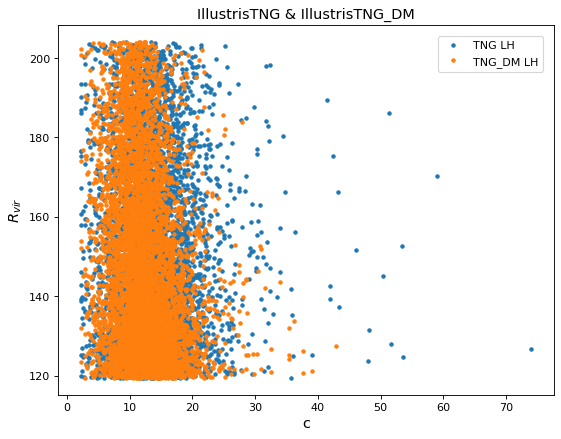

In [10]:
pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(halos_bar.cv, halos_bar.Rvir,'.',label = "TNG LH")
plt.plot(halos_dm.cv, halos_dm.Rvir,'.',label = "TNG_DM LH")

#plt.contour(edgex, edgey, valy1.T / np.sum(valy1), levels = 5, cmap = 'Purples')
#plt.colorbar()


plt.title('IllustrisTNG & IllustrisTNG_DM', fontsize = 13)
plt.legend(loc = 0, borderaxespad = 1.)
plt.xlabel('c', fontsize=13)
plt.ylabel(r'$R_{vir}$', fontsize=13)

In [11]:
bins = 15
##spin vs conc
ca_range   = [0.25, 1.05]
conc_range = [0.1, 30]
ba_range   = [0.45, 1.05]
spin_range = [0, 0.1]
rvir_range = [120, 200]
density    = False

In [99]:
valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.cv, bins=bins, range = [ spin_range,conc_range],density=density)
valx1,edge1,edge2 = np.histogram2d(halos_dm.Spin, halos_dm.cv, bins=bins, range = [ spin_range,conc_range],density=density)
valp1,edge1,edge2 = np.histogram2d(y_pred[:,0], y_pred[:,3], bins=bins, range = [ spin_range,conc_range],density=density)
edgex = am(edge1)
edgey = am(edge2)
#%print (edgey)

## vs c/a
_2valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.ca, bins=bins, range = [ spin_range,ca_range],density=density)
_2valx1,edge1,edge2 = np.histogram2d(halos_dm.Spin, halos_dm.ca, bins=bins, range = [ spin_range,ca_range],density=density)
_2valp1,edge1,edge2 = np.histogram2d(y_pred[:,0], y_pred[:,2], bins=bins, range = [ spin_range,ca_range],density=density)
_2edgex = am(edge1)
_2edgey = am(edge2)
#%


_3valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.ba, bins=bins, range = [ spin_range,ba_range],density=density)
_3valx1,edge1,edge2 = np.histogram2d(halos_dm.Spin, halos_dm.ba, bins=bins, range = [ spin_range,ba_range],density=density)
_3valp1,edge1,edge2 = np.histogram2d(y_pred[:,0], y_pred[:,1], bins=bins, range = [ spin_range,ba_range],density=density)
_3edgex = am(edge1)
_3edgey = am(edge2)

## halo concentration vs c/a
_4valy1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ca, bins=bins, range = [ conc_range,ca_range],density=density)
_4valx1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ca, bins=bins, range = [ conc_range,ca_range],density=density)
_4valp1,edge1,edge2 = np.histogram2d(y_pred[:,3], y_pred[:,2], bins=bins, range = [ conc_range,ca_range],density=density)
_4edgex = am(edge1)
_4edgey = am(edge2)

## halo concentration vs b/a
_5valy1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ba, bins=bins, range = [ conc_range,ba_range],density=density)
_5valx1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ba, bins=bins, range = [ conc_range,ba_range],density=density)
_5valp1,edge1,edge2 = np.histogram2d(y_pred[:,3], y_pred[:,1], bins=bins, range = [ conc_range,ba_range],density=density)
_5edgex = am(edge1)
_5edgey = am(edge2)

## ca vs b/a
_6valy1,edge1,edge2 = np.histogram2d(halos_bar.ca, halos_bar.ba, bins=bins, range = [ ca_range,ba_range],density=density)
_6valx1,edge1,edge2 = np.histogram2d(halos_dm.ca, halos_dm.ba, bins=bins, range = [ ca_range,ba_range],density=density)
_6valp1,edge1,edge2 = np.histogram2d(y_pred[:,2], y_pred[:,1], bins=bins, range = [ ca_range,ba_range],density=density)

_6edgex = am(edge1)
_6edgey = am(edge2)

In [101]:
import matplotlib

cmap = matplotlib.cm.get_cmap('Purples')
colorp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(1.0)]
colorpp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(0.9)]
cmap = matplotlib.cm.get_cmap('binary')
colorb = [ cmap(0.6),cmap(0.6),cmap(0.6),cmap(0.6)]
#colorbb = [ cmap(0.6),cmap(0.6),cmap(0.6),cmap(0.6)]
cmap = matplotlib.cm.get_cmap('Oranges')
coloro = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.8)]
coloroo = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.89)]

#colorp = colorp[1:]
#colorb = colorb[1:]
#coloro = coloro[1:]

def easyplot(valx,valy,valp,edgex,edgey,lrview=True,predview=True):
    alpha=0.26
    if lrview ==True:
        lvl = confidence_intervals(valx.T/valx.sum())
        ax.contourf(edgex,edgey,valx.T/valx.sum(),colors=colorp,levels=lvl,alpha=alpha)
        c1 = ax.contour(edgex,edgey,valx.T/valx.sum(),levels=lvl,colors=colorpp,linewidths=3)
        h1,l1 = c1.legend_elements()
    else:
        h1=None
    lvl = confidence_intervals(valy.T/valy.sum())
    ax.contourf(edgex,edgey,valy.T/valy.sum(),levels=lvl,colors=coloroo,alpha=alpha)
    c2 = ax.contour(edgex,edgey,valy.T/valy.sum(),levels=lvl,colors=coloro,linewidths=3)
    h2,l1 = c2.legend_elements()
    if predview == True:
        lvl = confidence_intervals(valp.T/valp.sum())
        CS = ax.contour(edgex,edgey,valp.T/valp.sum(),levels=lvl,colors=colorb,linewidths=4,linestyles='dashed')
        h3,l3 = CS.legend_elements()
        for c in CS.collections:
            c.set_dashes([(1,(3.0,3.0))])
    else:
        h3=None
    return h1,h2,h3

/tmp/ipykernel_58/1660954488.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_58/1660954488.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_58/1660954488.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')


/tmp/ipykernel_58/1660954488.py:34: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in CS.collections:


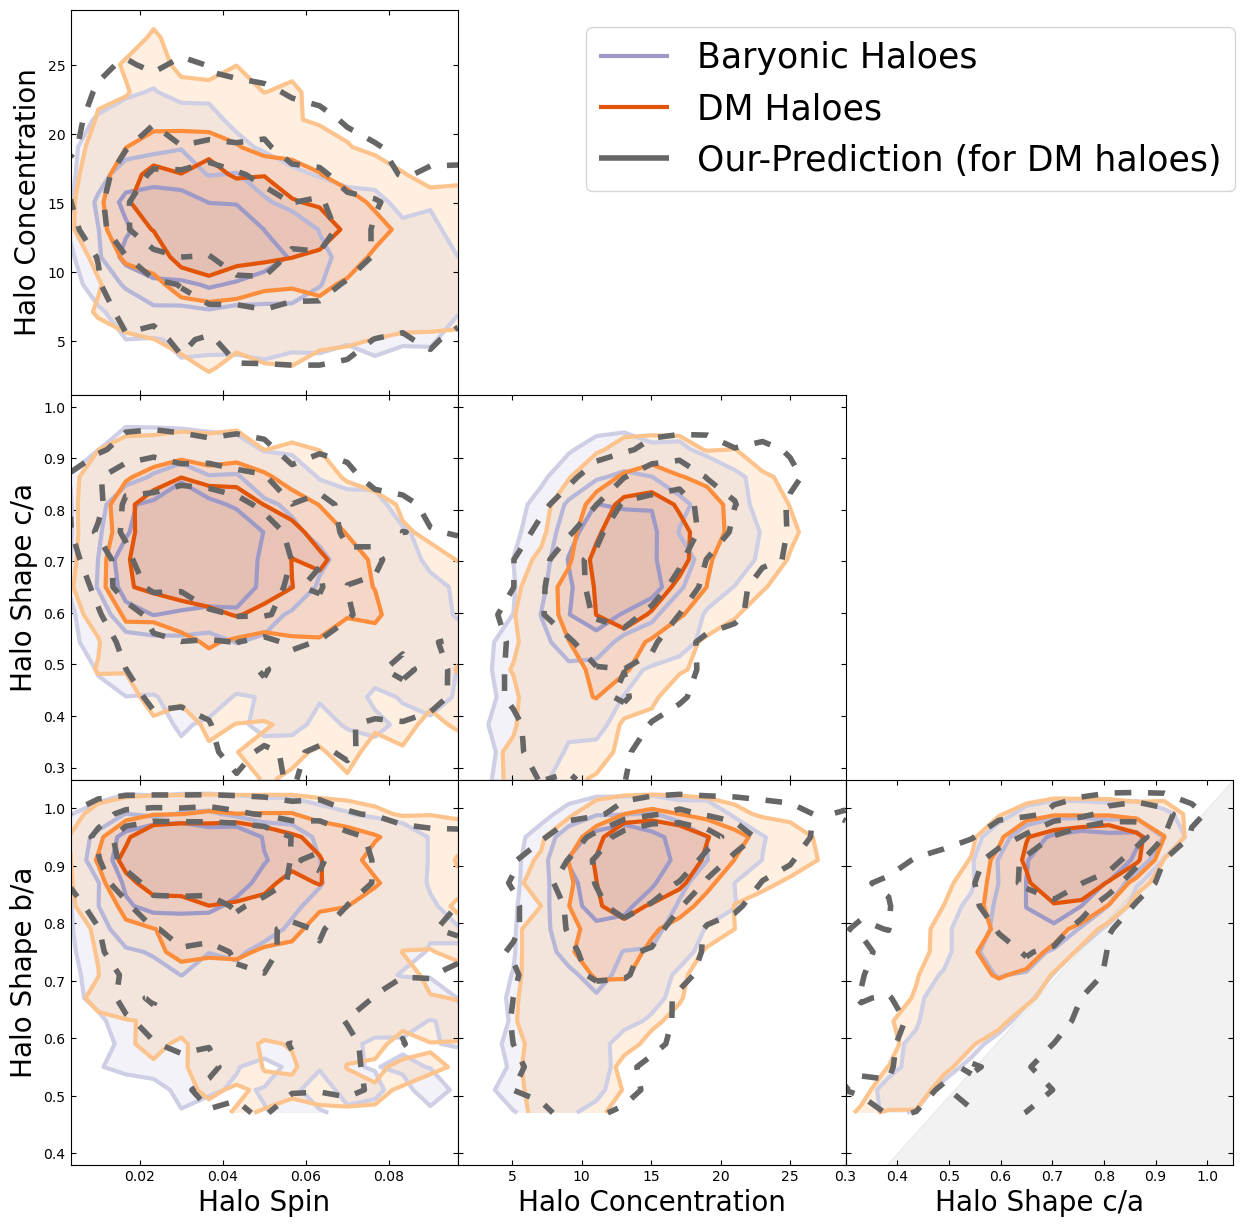

In [102]:
import time
t = time.time()

from matplotlib import pyplot as plt
from matplotlib import ticker, cm
#%from matplotlib import rc

#%rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#%rc('text', usetex=True)

lvl = [0.0014,0.0028,0.0035,1]
lvl = 3
lvl = [0.0014,0.0028,0.01]
#alpha=0.25

vmax = 0.008
vmaxcont = 0.005

fig,axs  = plt.subplots(3,3,figsize=(15,15),gridspec_kw={ 'wspace':0,'hspace': 0},sharex='col',sharey='row')
#ax = axs[0,0]
axs[0, 2].axis('off')
axs[0, 1].axis('off')
axs[1, 2].set_visible(False)

ax = axs[0,0]
h1,h2,h3 = easyplot(valx1,valy1,valp1,edgex,edgey)
axs[0,0].yaxis.set_ticks_position('both')
axs[0,0].tick_params(axis='x', direction='in')
axs[0,0].tick_params(axis='y', direction='in')
axs[0,0].xaxis.set_ticks_position('both')
axs[0,0].set_ylabel('Halo Concentration',fontsize=20)

if h3 is not None:
    axs[0,0].legend([h1[-2], h2[-2],h3[-2]], ['Baryonic Haloes', 'DM Haloes','Our-Prediction (for DM haloes)'],fontsize=25,bbox_to_anchor=(3.05, 1))
else:
    axs[0,0].legend([h1[-2], h2[-2]], ['Baryonic Haloes', 'DM Haloes'],fontsize=25,bbox_to_anchor=(3.05, 1))
    axs[0,0].text(2,0.5, '$2 \\times 10^{11} < M_{200}/M_{\odot}h^{-1} < 10^{12}$', transform = axs[0,0].transAxes, fontsize = 25)
    
#axs[1, 0].contourf(_2edgex,_2edgey,_2valy.T/_2valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
#axs[1, 0].contour(_2edgex,_2edgey,_2valy.T/_2valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
#axs[1, 0].contourf(_2edgex,_2edgey,_2valx.T/_2valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
#axs[1, 0].contour(_2edgex,_2edgey,_2valx.T/_2valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
axs[1,0].set_ylabel('Halo Shape c/a',fontsize=20)
#CS = axs[1, 0].contour(_2edgex,_2edgey,_2valp.T/_2valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3.5,linestyles='dotted')
ax = axs[1,0]
easyplot(_2valx1,_2valy1,_2valp1,_2edgex,_2edgey)
axs[1,0].yaxis.set_ticks_position('both')
axs[1,0].tick_params(axis='x', direction='in')
axs[1,0].tick_params(axis='y', direction='in')
axs[1,0].xaxis.set_ticks_position('both')
#for c in CS.collections:
#    c.set_dashes([(11, (3.0, 3.0))])
    
    
#axs[2, 0].contourf(_3edgex,_3edgey,_3valy.T/_3valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
#axs[2, 0].contour(_3edgex,_3edgey,_3valy.T/_3valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
#axs[2, 0].contourf(_3edgex,_3edgey,_3valx.T/_3valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
#axs[2, 0].contour(_3edgex,_3edgey,_3valx.T/_3valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
ax = axs[2,0]
easyplot(_3valx1,_3valy1,_3valp1,_3edgex,_3edgey)
axs[2,0].set_ylabel('Halo Shape b/a',fontsize=20)
axs[2,0].yaxis.set_ticks_position('both')
axs[2,0].tick_params(axis='x', direction='in')
axs[2,0].tick_params(axis='y', direction='in')
axs[2,0].xaxis.set_ticks_position('both')
#CS = axs[2, 0].contour(_3edgex,_3edgey,_3valp.T/_3valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
#for c in CS.collections:
#    c.set_dashes([(11, (3.0, 3.0))])
axs[2,0].set_xlabel('Halo Spin',fontsize=20)


## halo conc vs c/a
#axs[1, 1].contourf(_4edgex,_4edgey,_4valy.T/_4valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
#axs[1, 1].contour(_4edgex,_4edgey,_4valy.T/_4valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
#axs[1, 1].contourf(_4edgex,_4edgey,_4valx.T/_4valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
#axs[1, 1].contour(_4edgex,_4edgey,_4valx.T/_4valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
ax = axs[1,1]
easyplot(_4valx1,_4valy1,_4valp1,_4edgex,_4edgey)

axs[1,1].yaxis.set_ticks_position('both')
axs[1,1].tick_params(axis='x', direction='in')
axs[1,1].tick_params(axis='y', direction='in')
axs[1,1].xaxis.set_ticks_position('both')
#CS = axs[1, 1].contour(_4edgex,_4edgey,_4valp.T/_4valp.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
#for c in CS.collections:
#    c.set_dashes([(11, (3.0, 3.0))])

    
## halo conc vs b/a
#axs[2, 1].contourf(_5edgex,_5edgey,_5valy.T/_5valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
#axs[2, 1].contour(_5edgex,_5edgey,_5valy.T/_5valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
#axs[2, 1].contourf(_5edgex,_5edgey,_5valx.T/_5valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
#axs[2, 1].contour(_5edgex,_5edgey,_5valx.T/_5valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
axs[2,1].yaxis.set_ticks_position('both')
axs[2,1].tick_params(axis='x', direction='in')
axs[2,1].tick_params(axis='y', direction='in')
axs[2,1].xaxis.set_ticks_position('both')
#CS = axs[2, 1].contour(_5edgex,_5edgey,_5valp.T/_5valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
#for c in CS.collections:
#    c.set_dashes([(11, (3.0, 3.0))])
axs[2, 1].set_xlabel('Halo Concentration',fontsize=20)
ax = axs[2,1]
easyplot(_5valx1,_5valy1,_5valp1,_5edgex,_5edgey)


## halo conc vs b/a
#axs[2, 2].contourf(_6edgex,_6edgey,_6valy.T/_6valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
#axs[2, 2].contour(_6edgex,_6edgey,_6valy.T/_6valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
#axs[2, 2].contourf(_6edgex,_6edgey,_6valx.T/_6valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
#axs[2, 2].contour(_6edgex,_6edgey,_6valx.T/_6valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
axs[2,2].yaxis.set_ticks_position('both')
axs[2,2].tick_params(axis='x', direction='in')
axs[2,2].tick_params(axis='y', direction='in')
axs[2,2].xaxis.set_ticks_position('both')
#CS = axs[2, 2].contour(_6edgex,_6edgey,_6valp.T/_6valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
#for c in CS.collections:
#    c.set_dashes([(11, (3.0, 3.0))])
ax = axs[2,2]
x = np.linspace(0, 1.1, 4)
y = x
plt.fill_between(x, y, where=(x > 0), color='grey', alpha=0.1)
ax.set_xlim([0.3,1.05])
ax.set_ylim([0.38,1.05])

easyplot(_6valx1,_6valy1,_6valp1,_6edgex,_6edgey)


axs[2, 2].set_xlabel('Halo Shape c/a',fontsize=20)
#axs[0, 0].contourf(edgex,edgey,valp.T,vmin=0,vmax=1.5,levels=lvl,cmap='Purples',alpha=0.5)


#plt.subplots_adjust(hspace=.0)
#axs[0,0].grid()
#axs[1,0].grid()
#axs[1,1].grid()
#axs[2,0].grid()
#axs[2,1].grid()
#axs[2,2].grid()
#print (time.time()-t)

plt.savefig('BarVsDM.pdf')

In [103]:
from scipy import stats
def central68p3Percent(xfine,y,bins):
    """
    In each bin of xfine this function computes the central 68.3% scatter 
    """
    centralScatter = stats.binned_statistic(xfine,y, statistic=lambda y: (np.percentile(y,84.15)-np.percentile(y,15.85))/2, bins=bins, range=None)[0]
    return centralScatter 

In [44]:
halos_bar = data_bar[(data_bar.pid == -1)]

print(len(halos_bar))
min_mass_hbar        = halos_bar.Mvir.min()
max_mass_hbar        = halos_bar.Mvir.max()

halos_dm = data_dm[(data_dm.pid == -1)]

print(len(halos_dm))
min_mass_hdm        = halos_dm.Mvir.min()
max_mass_hdm        = halos_dm.Mvir.max()

169656
164154


In [104]:
min_mass = np.max((min_mass_hbar,min_mass_hdm))

In [105]:
max_mass = np.min((max_mass_hbar,max_mass_hdm))

In [106]:
mbin = np.logspace(np.log10(min_mass), np.log10(max_mass), 10)

In [112]:
y0_lr_conc68 = central68p3Percent(halos_dm.Mvir, halos_dm.cv, mbin)
y0_lr68      = central68p3Percent(halos_dm.Mvir, halos_dm.ca, mbin)
y0_lr_spin68 = central68p3Percent(halos_dm.Mvir, halos_dm.Spin, mbin)
y0_lr_ba68   = central68p3Percent(halos_dm.Mvir, halos_dm.ba, mbin)

y0_hr_conc68 = central68p3Percent(halos_bar.Mvir, halos_bar.cv, mbin)
y0_hr68      = central68p3Percent(halos_bar.Mvir, halos_bar.ca, mbin)
y0_hr_spin68 = central68p3Percent(halos_bar.Mvir, halos_bar.Spin, mbin)
y0_hr_ba68   = central68p3Percent(halos_bar.Mvir, halos_bar.ba, mbin)

In [113]:
y1_lr_conc68 = central68p3Percent(halos_dm.Mvir, y_pred[:,3], mbin)
y1_lr68      = central68p3Percent(halos_dm.Mvir, y_pred[:,2], mbin)
y1_lr_spin68 = central68p3Percent(halos_dm.Mvir, y_pred[:,0], mbin)
y1_lr_ba68   = central68p3Percent(halos_dm.Mvir, y_pred[:,1], mbin)

In [114]:
statistic = 'median'
y0_hr, edgesc0, bino0 = stats.binned_statistic(halos_bar.Mvir, halos_bar.ca, statistic=statistic, bins=mbin, range=None)
y0_lr, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, halos_dm.ca, statistic=statistic, bins=mbin, range=None)
y1_lr, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, y_pred[:,2], statistic=statistic, bins=mbin, range=None)

statistic = 'std'
y0_hrstd, edgesc0, bino0 = stats.binned_statistic(halos_bar.Mvir, halos_bar.ca, statistic=statistic, bins=mbin, range=None)
y0_lrstd, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, halos_dm.ca, statistic=statistic, bins=mbin, range=None)
y1_lrstd, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, y_pred[:,2], statistic=statistic, bins=mbin, range=None)


In [115]:
statistic = 'median'
y0_hr_ba, edgesc0, bino0 = stats.binned_statistic(halos_bar.Mvir, halos_bar.ba, statistic=statistic, bins=mbin, range=None)
y0_lr_ba, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, halos_dm.ba, statistic=statistic, bins=mbin, range=None)
y1_lr_ba, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, y_pred[:,1], statistic=statistic, bins=mbin, range=None)

statistic = 'std'
y0_hr_bastd, edgesc0, bino0 = stats.binned_statistic(halos_bar.Mvir, halos_bar.ba, statistic=statistic, bins=mbin, range=None)
y0_lr_bastd, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, halos_dm.ba, statistic=statistic, bins=mbin, range=None)
y1_lr_bastd, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, y_pred[:,1], statistic=statistic, bins=mbin, range=None)


In [116]:
statistic = 'median'
y0_hr_conc, edgesc0, bino0 = stats.binned_statistic(halos_bar.Mvir, halos_bar.cv, statistic=statistic, bins=mbin, range=None)
y0_lr_conc, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, halos_dm.cv, statistic=statistic, bins=mbin, range=None)
y1_lr_conc, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, y_pred[:,3], statistic=statistic, bins=mbin, range=None)

statistic = 'std'
y0_hr_concstd, edgesc0, bino0 = stats.binned_statistic(halos_bar.Mvir, halos_bar.cv, statistic=statistic, bins=mbin, range=None)
y0_lr_concstd, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, halos_dm.cv, statistic=statistic, bins=mbin, range=None)
y1_lr_concstd, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, y_pred[:,3], statistic=statistic, bins=mbin, range=None)


In [117]:
statistic = 'median'
y0_hr_spin, edgesc0, bino0 = stats.binned_statistic(halos_bar.Mvir, halos_bar.Spin, statistic=statistic, bins=mbin, range=None)
y0_lr_spin, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, halos_dm.Spin, statistic=statistic, bins=mbin, range=None)
y1_lr_spin, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, y_pred[:,0], statistic=statistic, bins=mbin, range=None)

statistic = 'std'
y0_hr_spinstd, edgesc0, bino0 = stats.binned_statistic(halos_bar.Mvir, halos_bar.Spin, statistic=statistic, bins=mbin, range=None)
y0_lr_spinstd, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, halos_dm.Spin, statistic=statistic, bins=mbin, range=None)
y1_lr_spinstd, edgesc0, bino0 = stats.binned_statistic(halos_dm.Mvir, y_pred[:,0], statistic=statistic, bins=mbin, range=None)


In [118]:
mbin

array([2.00100000e+11, 2.39244990e+11, 2.86047802e+11, 3.42006515e+11,
       4.08912270e+11, 4.88906606e+11, 5.84550005e+11, 6.98903849e+11,
       8.35628408e+11, 9.99100000e+11])

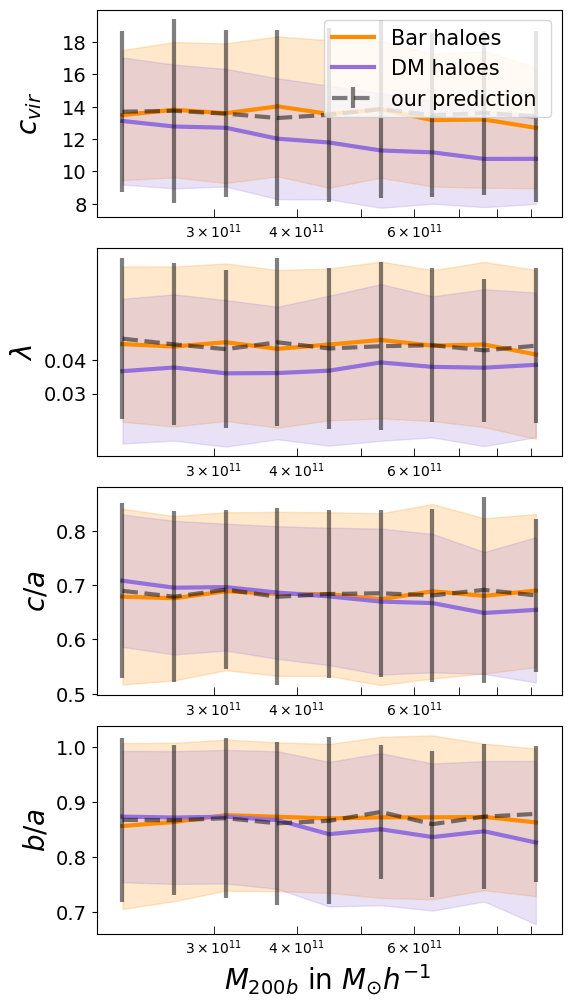

In [120]:
fig = plt.figure(figsize=(6,12))
from matplotlib.gridspec import GridSpec

gs = GridSpec(4, 1, hspace=0.15,wspace=0.0)
hrcolor='darkorange'
lrcolor='mediumpurple'
ax1 = fig.add_subplot(gs[0])

plt.plot(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_hr_conc),label='Bar haloes',linewidth=3,color=hrcolor,marker='None',mfc='none')
plt.fill_between(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_hr_conc-y0_hr_conc68),(y0_hr_conc+y0_hr_conc68),color=hrcolor,alpha=0.2)

plt.plot(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_lr_conc),label='DM haloes ',linewidth=3,color=lrcolor,marker='None',mfc='goldenrod')
plt.fill_between(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_lr_conc-y0_lr_conc68),(y0_lr_conc+y0_lr_conc68),color=lrcolor,alpha=0.2)

plt.errorbar(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y1_lr_conc),(y1_lr_concstd),label='our prediction ',linewidth=3,alpha=0.5,color='black',linestyle='dashed')
plt.xscale('log')
#plt.xlabel(r'$M_{200b}$ in $M_{\odot} h^{-1}$ ',fontsize=20)
plt.ylabel(r'$c_{vir}$',fontsize=20,labelpad=13)
plt.xlim([min_mass, max_mass])
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
ax1.tick_params(axis="x", direction='in',which='both', length=6)
ax1.set_xticklabels([])

plt.legend(fontsize=15)



ax2 = fig.add_subplot(gs[1],sharex=ax1)
insideplot = 0.8
#plt.tick_params('x',direction='in', labelbottom=False,which='both')
plt.plot(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_hr_spin),label='Bar haloes',linewidth=3,color=hrcolor,marker='None',mfc='none')
plt.fill_between(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_hr_spin-y0_hr_spin68),(y0_hr_spin+y0_hr_spin68),color=hrcolor,alpha=0.2)


plt.plot(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_lr_spin),label='DM haloes ',linewidth=3,color=lrcolor,marker='None',mfc='brown')
plt.fill_between(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_lr_spin-y0_lr_spin68),(y0_lr_spin+y0_lr_spin68),color=lrcolor,alpha=0.2)

plt.errorbar(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y1_lr_spin),(y1_lr_spin68),label='our prediction ',linewidth=3,alpha=0.5,color='black',linestyle='dashed')
#plt.plot(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y1_lr_spin),label='our prediction ',linewidth=3,color='black',marker='None',linestyle='dashed')
plt.xscale('log')
plt.xticks(fontsize=20)
ax2.tick_params(axis="x", direction='in',which='both', length=6)
plt.yticks(fontsize=14)

ax2.set_yticks(np.arange(0.03,0.045,.01))


#plt.xlabel(r'$M_{200b}$ in $M_{\odot} h^{-1}$ ',fontsize=20)
plt.ylabel(r'$\lambda$',fontsize=20)
plt.xlim([min_mass, max_mass])

ax2 = fig.add_subplot(gs[2],sharex=ax1)
#plt.tick_params('x',direction='in', labelbottom=False,which='both')
plt.plot(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_hr),label='Bar Haloes',linewidth=3,color=hrcolor,marker='None')
plt.fill_between(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_hr-y0_hr68),(y0_hr+y0_hr68),color=hrcolor,alpha=0.2)


plt.plot(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_lr),label='DM Haloes ',linewidth=3,color=lrcolor,marker='None')
plt.fill_between(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_lr-y0_lr68),(y0_lr+y0_lr68),color=lrcolor,alpha=0.2)

plt.errorbar(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y1_lr),(y1_lr68),label='our prediction ',linewidth=3,alpha=0.5,color='black',linestyle='dashed')

#plt.plot(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y1_lr),label='ML prediction ',linewidth=3,color='black',marker='None',linestyle='dashed')
#plt.ylim([0.68,0.78])
plt.xscale('log')
#plt.xlabel(r'$M_{200b}$ in $M_{\odot} h^{-1}$ ',fontsize=20)
plt.ylabel(r'$c/a$',fontsize=20)
plt.xlim([min_mass, max_mass])
plt.xticks(fontsize=20)
ax2.tick_params(axis="x", direction='in',which='both', length=6)
plt.yticks(fontsize=14)


ax2 = fig.add_subplot(gs[3],sharex=ax1)
plt.plot(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_hr_ba),label='Bar_test_data',linewidth=3,color=hrcolor,marker='None',mfc='none')
plt.fill_between(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_hr_ba-y0_hr_ba68),(y0_hr_ba+y0_hr_ba68),color=hrcolor,alpha=0.2)


plt.plot(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_lr_ba),label='DM_test_data ',linewidth=3,color=lrcolor,marker='None',mfc='goldenrod')
plt.fill_between(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y0_lr_ba-y0_lr_ba68),(y0_lr_ba+y0_lr_ba68),color=lrcolor,alpha=0.2)

plt.errorbar(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y1_lr_ba),(y1_lr_ba68),label='our prediction ',linewidth=3,alpha=0.5,color='black',linestyle='dashed')

#plt.plot(np.sqrt(edgesc0[1:]*edgesc0[:-1]),(y1_lr_ba),label='ML prediction ',linewidth=3,color='black',linestyle='dashed')
plt.xscale('log')
plt.xlabel(r'$M_{200b}$ in $M_{\odot} h^{-1}$ ',fontsize=20)
plt.ylabel(r'$b/a$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
#plt.ylim([0.80,0.89])
plt.xlim([min_mass, max_mass])
plt.xlabel(r'$M_{200b}$ in $M_{\odot} h^{-1}$ ',fontsize=20)
ax2.tick_params(axis="x", direction='in',which='both', length=6)

#plt.savefig('recov-summarystats.pdf', bbox_inches='tight',transparent=True)